<font size=6><b>Seminar 3 - systems of differential equations</b></font><br/>
<font size=5>2021-11-11</b><br/>
<font size=3>Michal Kubišta<br/>
    <kubistmi@gmail.com></font>

# Content
<font size=3>
    <ol>
        <li>Quantitative solutions</li>
        <li>Qualitative solutions</li>
    </ol>
</font>

1) fixed point 

2) equilibrium lines

3) vector field

4) eigen vectors

5) particular solutions

---
# Quantitative solutions
---

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

In [2]:
t = sp.symbols('t', real=True)

x = sp.Function('x')(t)
y = sp.Function('y')(t)

a = sp.symbols('a')
b = sp.symbols('b')
c = sp.symbols('c')
d = sp.symbols('d')
e = sp.symbols('e')
f = sp.symbols('f')

#### First, we setup the system of two equations generally.

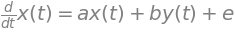

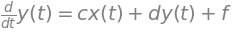

In [3]:
eq1 = sp.Eq(x.diff(t), a*x + b*y + e)
eq2 = sp.Eq(y.diff(t), c*x + d*y + f)

display(eq1, eq2)

#### We can simply substitute the specific values into this system.

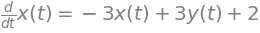

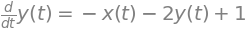

In [4]:
eq1s = eq1.subs([(a,-3),(b,3),(e,2)])
eq2s = eq2.subs([(c,-1),(d,-2),(f,1)])

display(eq1s, eq2s)

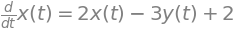

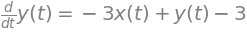

In [5]:
eq1s = eq1.subs([(a,2),(b,-3),(e,2)])
eq2s = eq2.subs([(c,-3),(d,1),(f,-3)])

display(eq1s, eq2s)

#### Sympy makes solving these equations trivial. 

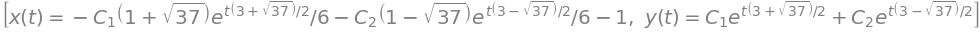

In [6]:
sol = sp.dsolve([eq1s, eq2s],[x, y])
sol

---
# Qualitative solutions
---

#### Start by finding the equilibrium lines, by solving the RHS of both equations in the system with respect to y.  
We get two specifications of a line in the form: $y(t) = a * x(t) + b$, we need only the RHS.

In [7]:
x0 = sp.solve(sp.Eq(eq1s.rhs), y)[0]
y0 = sp.solve(sp.Eq(eq2s.rhs), y)[0]

display(x0, y0)

C:\Users\novpe\anaconda3\lib\site-packages\sympy\core\relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


In [8]:
x_eq = sp.solve(sp.Eq(x0, y0), x)[0]
y_eq = y0.subs(x, x_eq)

display(x_eq, y_eq)

In [9]:
eigens = sp.Matrix([
    sp.Poly(eq1s.rhs).coeffs()[:2],
    sp.Poly(eq2s.rhs).coeffs()[:2]
]).eigenvects()

eigens

⎡⎛            ⎡⎡  1   √37⎤⎤⎞  ⎛            ⎡⎡  √37   1⎤⎤⎞⎤
⎢⎜3   √37     ⎢⎢- ─ + ───⎥⎥⎟  ⎜3   √37     ⎢⎢- ─── - ─⎥⎥⎟⎥
⎢⎜─ - ───, 1, ⎢⎢  6    6 ⎥⎥⎟, ⎜─ + ───, 1, ⎢⎢   6    6⎥⎥⎟⎥
⎢⎜2    2      ⎢⎢         ⎥⎥⎟  ⎜2    2      ⎢⎢         ⎥⎥⎟⎥
⎣⎝            ⎣⎣    1    ⎦⎦⎠  ⎝            ⎣⎣    1    ⎦⎦⎠⎦

#### So, what do we have so far?

In [10]:
xsize = 25                                        # number of points on x axis
ysize = 25                                        # number of points on y axis
x_vals = np.linspace(-10, 10, xsize)              # prepare the x-values
y_vals = np.linspace(-30, 30, ysize)              # prepare the y-values

xeq = sp.lambdify(x, x0)
yeq = sp.lambdify(x, y0)
x0_vals = [xeq(i) for i in x_vals]                # equilibrium line x' = 0
y0_vals = [yeq(i) for i in x_vals]                # equilibrium line y' = 0

eigen_1 = x_vals / eigens[0][2][0][0].evalf() + y_eq
eigen_2 = x_vals / eigens[1][2][0][0].evalf() + y_eq

display(eigens, eigen_1, eigen_2)

⎡⎛            ⎡⎡  1   √37⎤⎤⎞  ⎛            ⎡⎡  √37   1⎤⎤⎞⎤
⎢⎜3   √37     ⎢⎢- ─ + ───⎥⎥⎟  ⎜3   √37     ⎢⎢- ─── - ─⎥⎥⎟⎥
⎢⎜─ - ───, 1, ⎢⎢  6    6 ⎥⎥⎟, ⎜─ + ───, 1, ⎢⎢   6    6⎥⎥⎟⎥
⎢⎜2    2      ⎢⎢         ⎥⎥⎟  ⎜2    2      ⎢⎢         ⎥⎥⎟⎥
⎣⎝            ⎣⎣    1    ⎦⎦⎠  ⎝            ⎣⎣    1    ⎦⎦⎠⎦

array([-11.8046042171637, -10.8208871990667, -9.83717018096975,
       -8.85345316287277, -7.86973614477580, -6.88601912667882,
       -5.90230210858185, -4.91858509048487, -3.93486807238790,
       -2.95115105429092, -1.96743403619395, -0.983717018096974, 0,
       0.983717018096976, 1.96743403619395, 2.95115105429092,
       3.93486807238790, 4.91858509048488, 5.90230210858185,
       6.88601912667882, 7.86973614477580, 8.85345316287277,
       9.83717018096975, 10.8208871990667, 11.8046042171637], dtype=object)

array([8.47127088383037, 7.76533164351117, 7.05939240319197,
       6.35345316287277, 5.64751392255358, 4.94157468223438,
       4.23563544191518, 3.52969620159599, 2.82375696127679,
       2.11781772095759, 1.41187848063839, 0.705939240319196, 0,
       -0.705939240319198, -1.41187848063840, -2.11781772095759,
       -2.82375696127679, -3.52969620159599, -4.23563544191518,
       -4.94157468223438, -5.64751392255358, -6.35345316287277,
       -7.05939240319197, -7.76533164351117, -8.47127088383037],
      dtype=object)

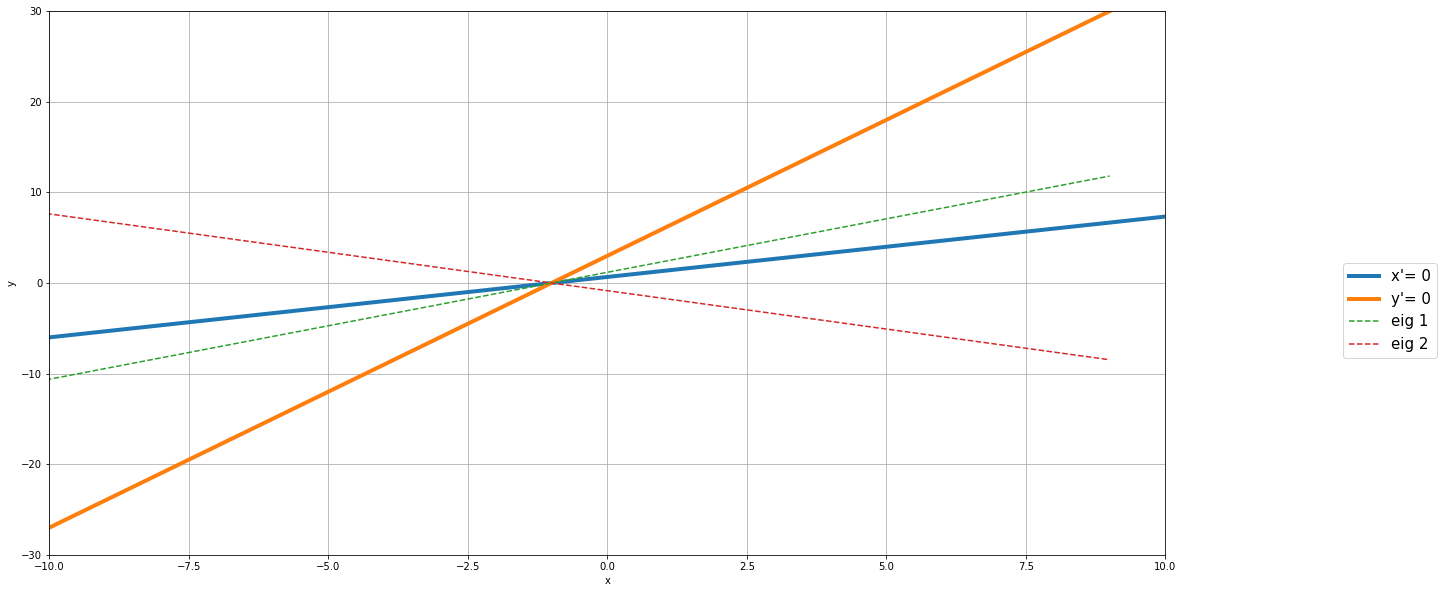

In [11]:
fig = plt.figure(figsize=(20,10))
plt.grid()                                                       # prepare a grid 

plt.xlim(-10, 10)
plt.ylim(-30, 30)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_vals, x0_vals, linewidth = 4, label = "x'= 0")      # equilibrium lines 
plt.plot(x_vals, y0_vals, linewidth = 4, label = "y'= 0")

plt.plot(x_vals + x_eq, eigen_1, linestyle = '--', label = "eig 1")
plt.plot(x_vals + x_eq, eigen_2, linestyle = '--', label = "eig 2")

plt.legend(bbox_to_anchor=(1.25, 0.55), prop={'size': 15})        # add legend, outside of the plot

#### With these lines, we can have a look into the specific regions of the plot to prepare example particular solutions.

In [12]:
def particular(eq, x_cond, y_cond, points = 150, tmin = -2, tmax = 2):
    """
    Find the particular solution of provided system of differential equations.
  
    This function firstly solves the initial conditions and the calculates the resulting function values
    for `points` number of points between the provided parameter interval (`tmin` and `tmax`).
    The initial conditions are used in the following form:
        x(0) = x_cond
        y(0) = y_cond
  
    Parameters
    ----------
    eq (list(sympy.Eq)):
        list of 2 sympy equations describing the system with the following expectations:
                       LHS      RHS
            - eq[0] -> x(t) = f(t, C1, C2)
            - eq[0] -> y(t) = f(t, C1, C2)

    x_cond (float):
        initial condition for x, in the form x(0) = x_cond
        
    y_cond (float):
        initial condition for y, in the form y(0) = y_cond

    points (int):
        number of points to be calculated
    
    tmin (float):
        minimum of the interval of parameter (`t`) values
    
    tmax (float):
        maximum of the interval of parameter (`t`) values

    Returns
    ----------
    tuple(x_p, y_p):
        x_p (numpy.ndarray):
            x-coordinates of the values of particular solution of size `points` 

        y_p (numpy.ndarray):
            y-coordinates of the values of particular solution of size `points` 
    """
    xt0 = eq[0].rhs.subs(t,0)                                               # substitute t = 0 into both equations
    yt0 = eq[1].rhs.subs(t,0)
    
    conds = sp.solve([sp.Eq(xt0, x_cond), sp.Eq(yt0, y_cond)])              # find the parameter values
    c1 = sp.Symbol('C1')
    c2 = sp.Symbol('C2')
    
    sol_p = [i.subs([('C1', conds[c1]), ('C2', conds[c2])]) for i in eq]   # and substitute them back into equations

    t_vals = np.linspace(tmin, tmax, points)                                # define t interval
    x_p = np.zeros(points)
    y_p = np.zeros(points)

    xfun = sp.lambdify(t, sol_p[0].rhs)
    yfun = sp.lambdify(t, sol_p[1].rhs)
    
    for i in range(points):                                                  # and calculate x, y values
        x_p[i] = xfun(t_vals[i])
        y_p[i] = yfun(t_vals[i])
    
    return(x_p, y_p)

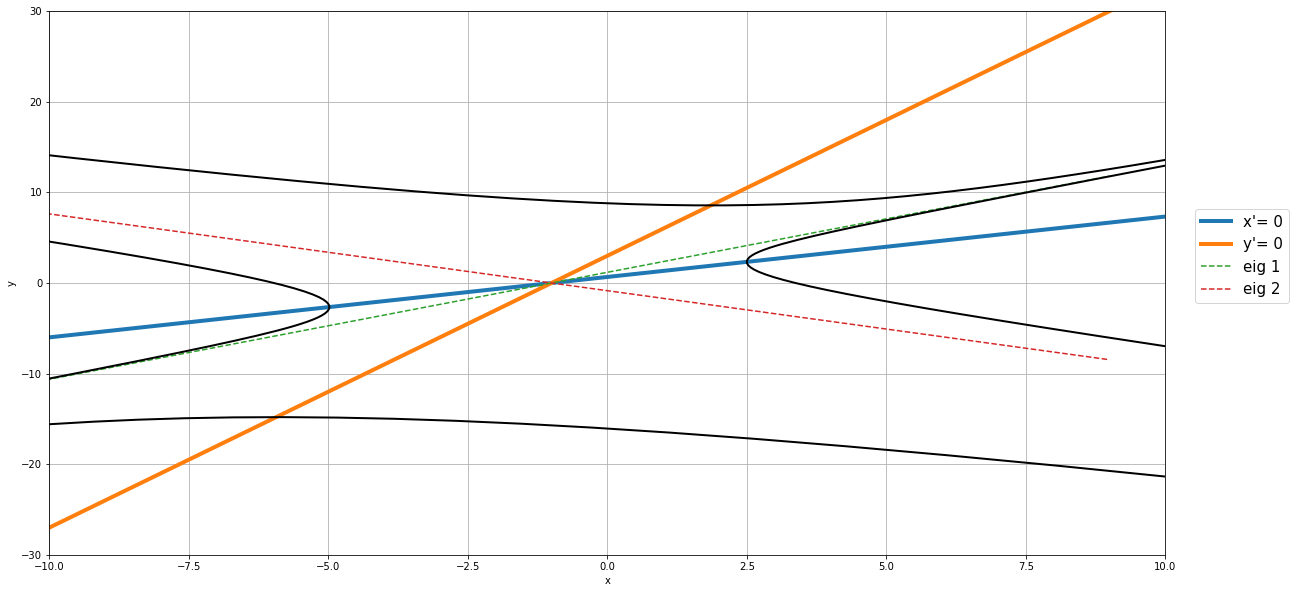

In [13]:
fig = plt.figure(figsize=(20, 10))
plt.grid()

plt.xlim(-10, 10)
plt.ylim(-30, 30)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_vals, x0_vals, linewidth = 4, label = "x'= 0")      # equilibrium lines 
plt.plot(x_vals, y0_vals, linewidth = 4, label = "y'= 0")

plt.plot(x_vals + x_eq, eigen_1, linestyle = '--', label = "eig 1")
plt.plot(x_vals + x_eq, eigen_2, linestyle = '--', label = "eig 2")

plt.legend(bbox_to_anchor=(1.02, 0.55), prop={'size': 15})     # add legend, outside of the plot

# NEW CODE BELLOW:
xyp = [particular(sol, i[0], i[1]) for i in [(6,10),(-5,-3),(-8,-15),(2.5,2.3)]]
_ = [plt.plot(i[0], i[1], linewidth = 2, color = 'black') for i in xyp]

In [14]:
def vector_field(xfun, yfun, xvals, yvals):
    """
    Calculate the vector field for the system of differential equations.
  
    This function prepares a grid of [x,y] points from xvals and yvals and then 
    calculates the value of the xfun and yfund for each of these points.
    It returns a tuple in a format suitable for `matplotlib.pyplot.quiver()`
  
    Parameters
    ----------
    xfun (function(x, y float) float):
        function describing the x-coordinate of the vector (arrow) at point [x,y]

    
    yfun (function(x,y float) float):
        function describing the y-coordinate of the vector (arrow) at point [x,y]

    xvals (np.ndarray):
        list of values that define the x-axis of the grid 

    yvals (np.ndarray):
        list of values that define the y-axis of the grid
  
    Returns
    ----------
    tuple(xa_vals, ya_vals, dxa, dya):
        xa_vals (numpy.ndarray):
            array of x (x coordinates) for each point

        ya_vals (numpy.ndarray):
            array of y (y coordinates) for each point

        dxa (numpy.ndarray):
            array of x coordinate of the vectors (arrows)

        dya (numpy.ndarray):
            array of y coordinate of the vectors (arrows)
        
    """
    gridsize = len(xvals) * len(yvals)            # the grid [x,y]
    xa_vals = np.zeros(gridsize)                  # arrow position x
    ya_vals = np.zeros(gridsize)                  # arrow position y
    dxa = np.zeros(gridsize)                      # arrow direction x
    dya = np.zeros(gridsize)                      # arrow direction y
    
    p = 0
    for i in xvals:                               # for every x value
        for j in yvals:                           # for every x & y value
            xa_vals[p] = i                        # save the combination
            ya_vals[p] = j
            dxa[p] = xfun(i, j)                   # calculate both derivatives
            dya[p] = yfun(i, j)
            p += 1                                # increment the position
    
    return(xa_vals, ya_vals, dxa, dya)

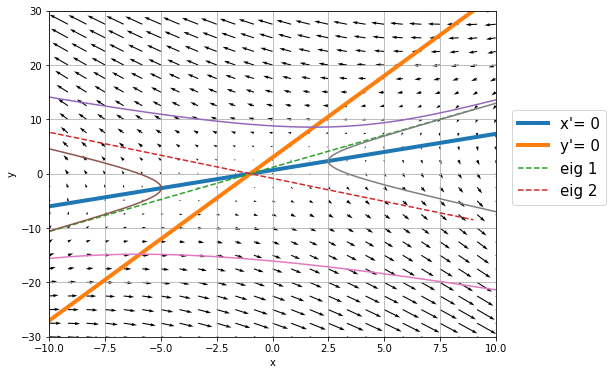

In [15]:
fig = plt.figure(figsize=(8, 6))
plt.grid()

plt.xlim(-10, 10)
plt.ylim(-30, 30)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_vals, x0_vals, linewidth = 4, label = "x'= 0")      # equilibrium lines 
plt.plot(x_vals, y0_vals, linewidth = 4, label = "y'= 0")

plt.plot(x_vals + x_eq, eigen_1, linestyle = '--', label = "eig 1")
plt.plot(x_vals + x_eq, eigen_2, linestyle = '--', label = "eig 2")

plt.legend(bbox_to_anchor=(1.02, 0.55), prop={'size': 15})     # add legend, outside of the plot

_ = [plt.plot(i[0],i[1]) for i in xyp]

# NEW CODE BELLOW:
xfun = sp.lambdify((x,y), eq1s.rhs) 
yfun = sp.lambdify((x,y), eq2s.rhs)

xa, ya, dxa, dya = vector_field(xfun, yfun, x_vals, y_vals)
plt.quiver(xa, ya, dxa, dya)                                   # add the arrows